# Previsão básica para pedralva

In [1]:

# importar bibliotecas
import xarray as xr
import matplotlib.pyplot as plt

/home/tito/anaconda3/lib/python3.5/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
# url do opendap
# primeiramente fazer uma função que obtenha a data de hoje
import time
# obter a data de hoje no formato necessario
#today = time.strftime('%Y%m%d')
today='20170809'
print(today)
# inserir a data no formato específico na url
url = 'http://nomads.ncep.noaa.gov:9090/dods/gfs_0p25/gfs{}/gfs_0p25_00z'.format(today)

# abrir o dado
ds = xr.open_dataset(url)

# observar a info
print(ds)


20170809
<xarray.Dataset>
Dimensions:         (lat: 721, lev: 31, lon: 1440, time: 81)
Coordinates:
  * time            (time) datetime64[ns] 2017-08-09 2017-08-09T03:00:00 ...
  * lev             (lev) float64 1e+03 975.0 950.0 925.0 900.0 850.0 800.0 ...
  * lat             (lat) float64 -90.0 -89.75 -89.5 -89.25 -89.0 -88.75 ...
  * lon             (lon) float64 0.0 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0 ...
Data variables:
    absvprs         (time, lev, lat, lon) float64 ...
    no4lftxsfc      (time, lat, lon) float64 ...
    no5wavh500mb    (time, lat, lon) float64 ...
    acpcpsfc        (time, lat, lon) float64 ...
    albdosfc        (time, lat, lon) float64 ...
    apcpsfc         (time, lat, lon) float64 ...
    capesfc         (time, lat, lon) float64 ...
    cape180_0mb     (time, lat, lon) float64 ...
    cape255_0mb     (time, lat, lon) float64 ...
    cfrzrsfc        (time, lat, lon) float64 ...
    cicepsfc        (time, lat, lon) float64 ...
    cinsfc          (time, l

In [3]:
# Usar o geopandas para obter a coordenada geográfica de pedralva
from geopandas.tools import geocode

gdf  = geocode('Pedralva,Brasil')
print(gdf)
lon,lat=gdf.geometry[0].xy

                                             address  \
0  Pedralva - State of Minas Gerais, 37520-000, B...   

                          geometry  
0  POINT (-45.4686431 -22.2557397)  
array('d', [-45.4686431]) array('d', [-22.2557397])


In [4]:
# obter os dados do ponto 

point = ds.sel(lon=lon[0]+360,lat=lat[0],method='nearest')

# Dar uma olhada nos dados

In [21]:
ax = point['tmp30_0mb'].plot()

In [15]:
point['tmp2pv'].plot()

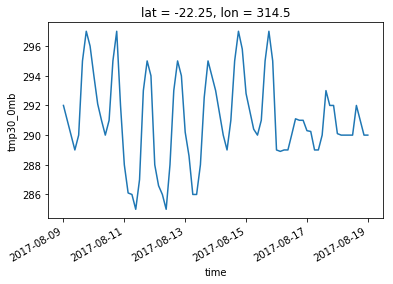

In [22]:
plt.show()

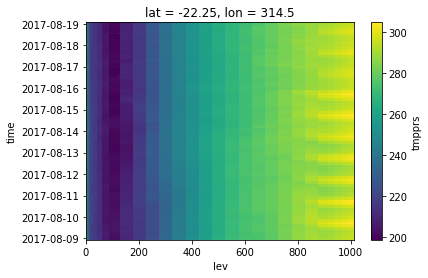

In [17]:
point['tmpprs'].plot()
plt.show()

In [18]:
point['tmpprs'].sel(lev=1000).plot()

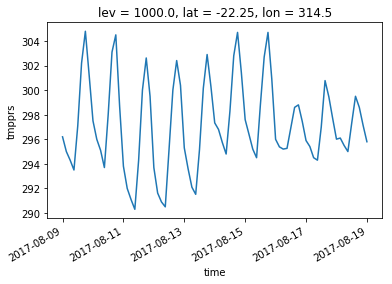

In [19]:
plt.show()

In [20]:
point['lev']

<xarray.DataArray 'lev' (lev: 31)>
array([ 1000.,   975.,   950.,   925.,   900.,   850.,   800.,   750.,   700.,
         650.,   600.,   550.,   500.,   450.,   400.,   350.,   300.,   250.,
         200.,   150.,   100.,    70.,    50.,    30.,    20.,    10.,     7.,
           5.,     3.,     2.,     1.])
Coordinates:
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 850.0 800.0 750.0 ...
    lat      float64 -22.25
    lon      float64 314.5
Attributes:
    grads_dim:      z
    grads_mapping:  levels
    units:          millibar
    long_name:      altitude
    minimum:        1000.0
    maximum:        1.0
    resolution:     33.3